In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\data.csv")

In [3]:

# Display first 5 rows
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [4]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Data types and null values
df.info()


Shape of dataset: (9712, 8)
<class 'pandas.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   str    
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   str    
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   str    
 7   Urban_or_Rural                     9712 non-null   str    
dtypes: bool(1), float64(2), int64(1), str(4)
memory usage: 540.7 KB


In [5]:
# Statistical summary for numerical columns
df.describe()


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [8]:
df.describe(include=['object', 'string'])




,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9712,9712,6494,9712
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4942,4568,2268,6851


In [9]:
import warnings
warnings.filterwarnings('ignore')


In [10]:
# Count missing values
df.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

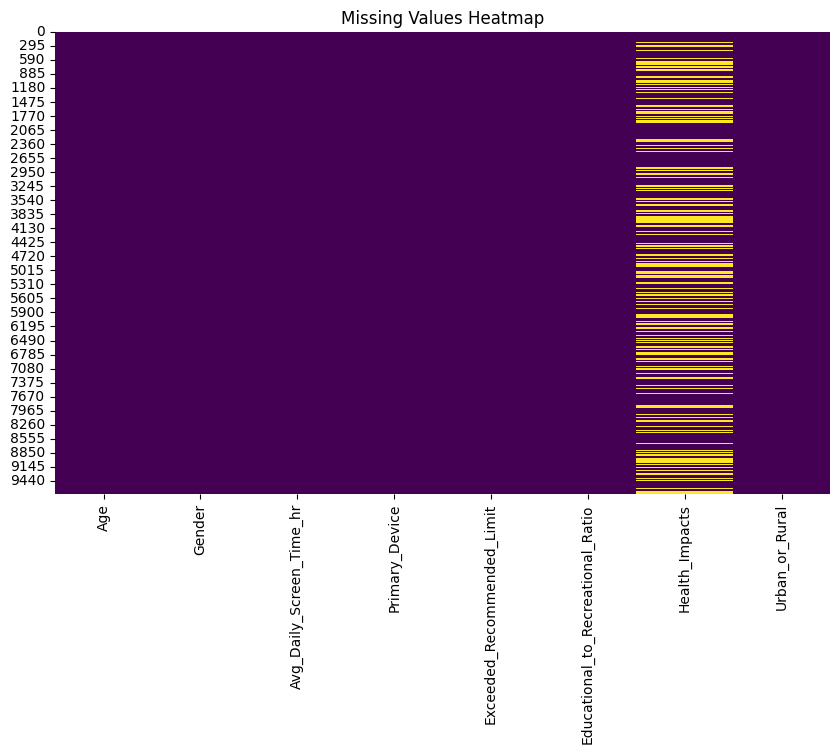

In [11]:
#Visualize Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [12]:
#Step 6: Handle Missing Values (If Any)
# Example: Fill numeric missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Example: Fill categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [13]:
# Fill categorical columns safely
cat_cols = df.select_dtypes(include=['object', 'string']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
df.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [15]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if needed
df.drop_duplicates(inplace=True)


Duplicate rows: 47


In [16]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [20]:
import numpy as np

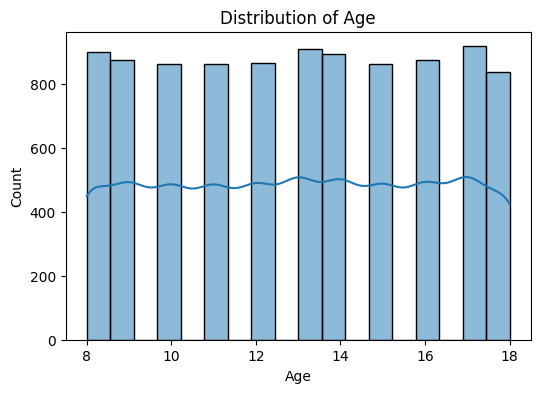

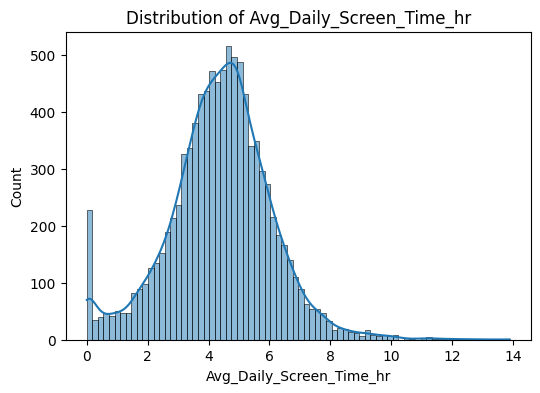

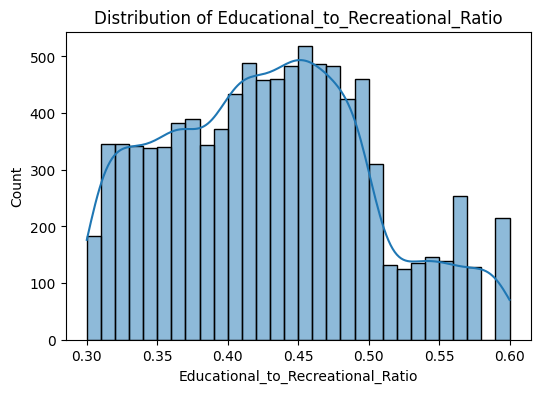

In [21]:
#Numerical Columns Distribution
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


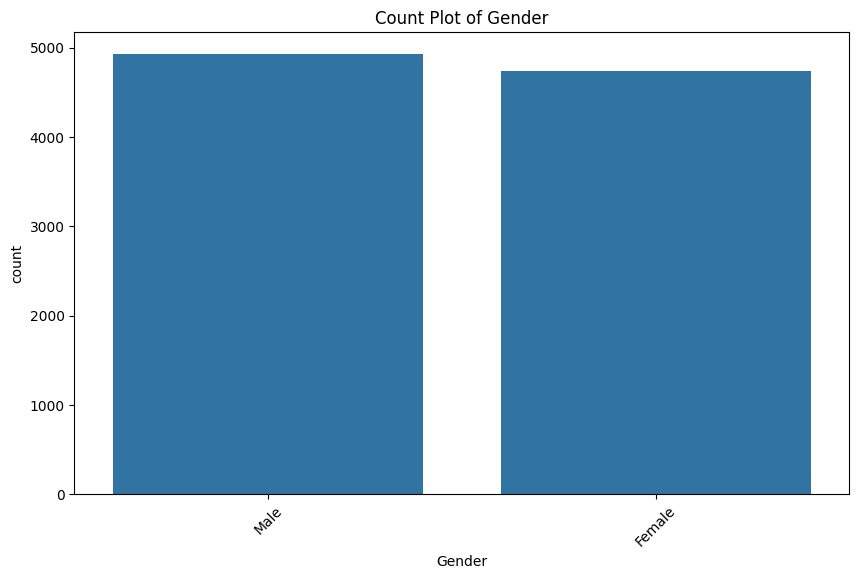

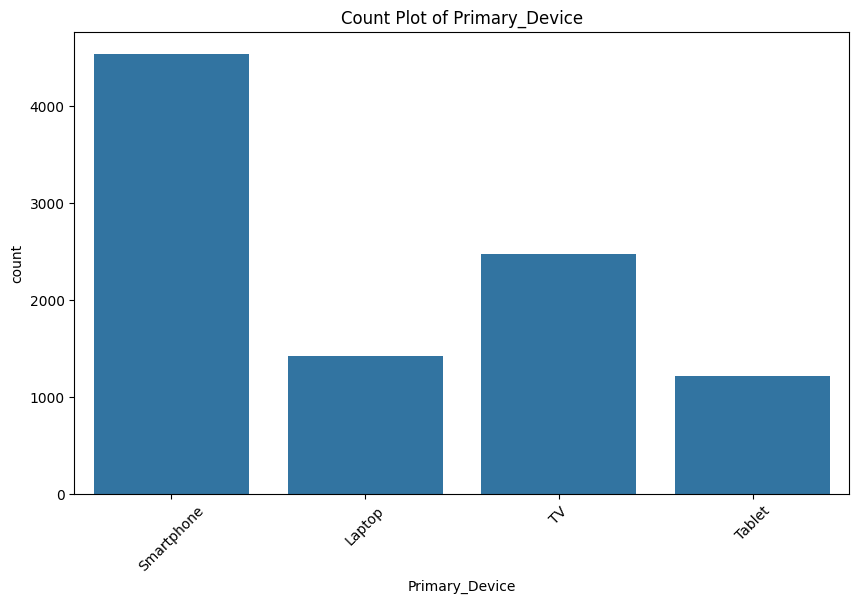

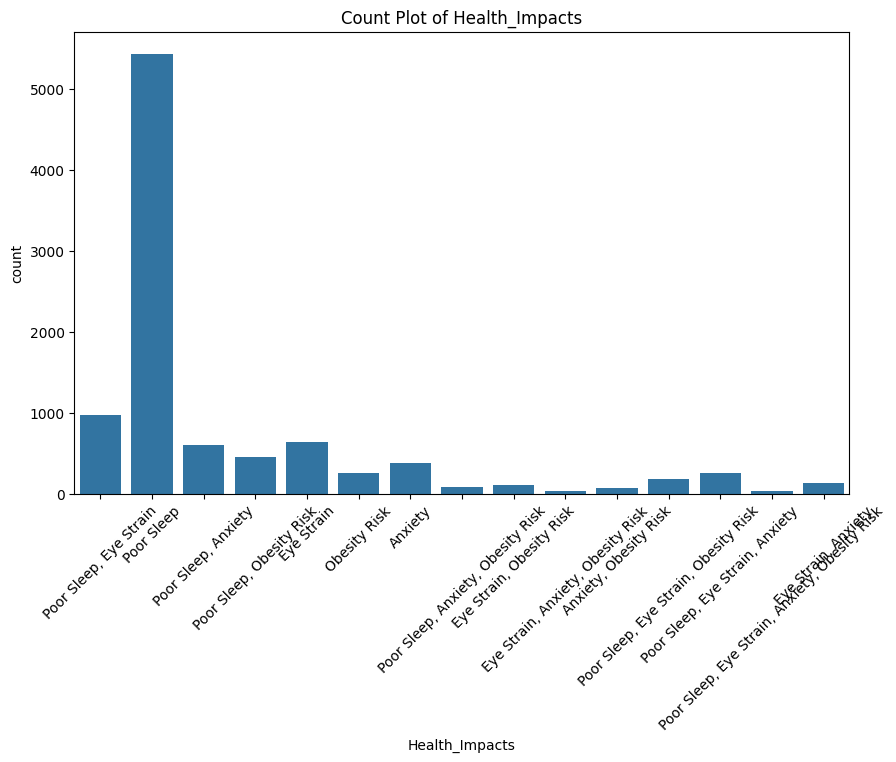

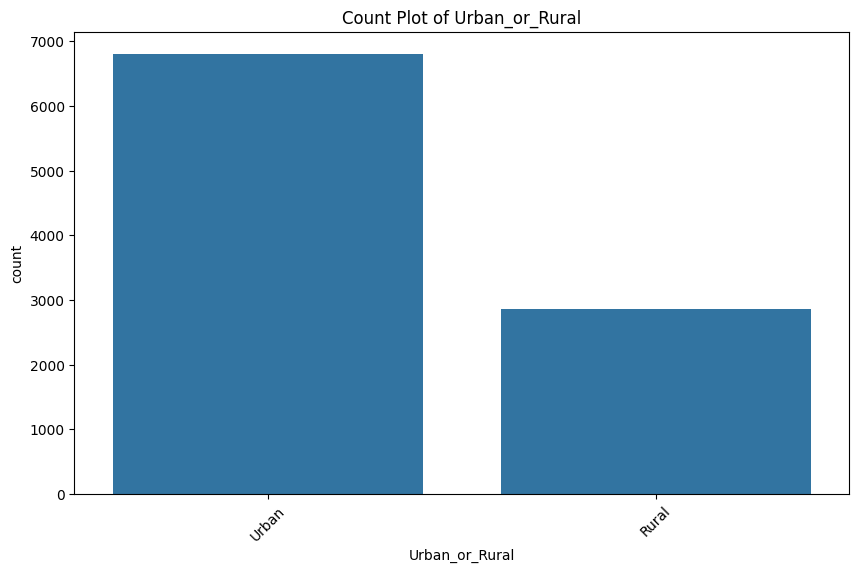

In [26]:
#Categorical Columns Count
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()


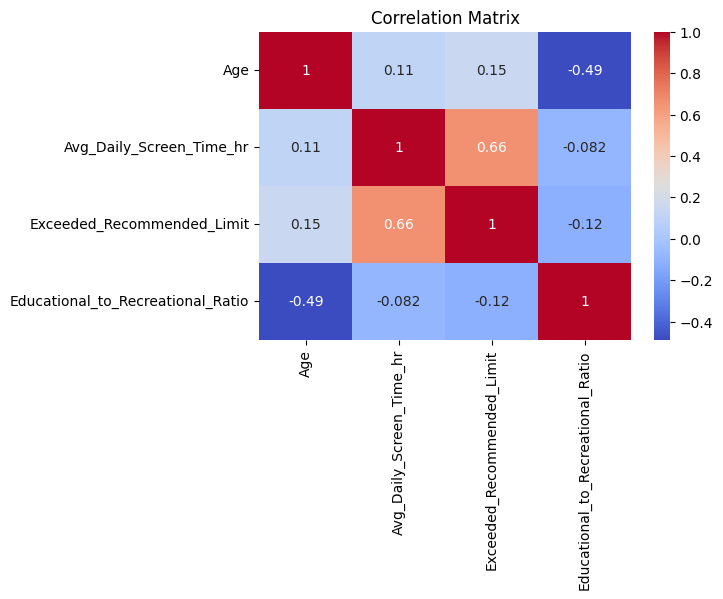

In [28]:
#correlated matrix
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

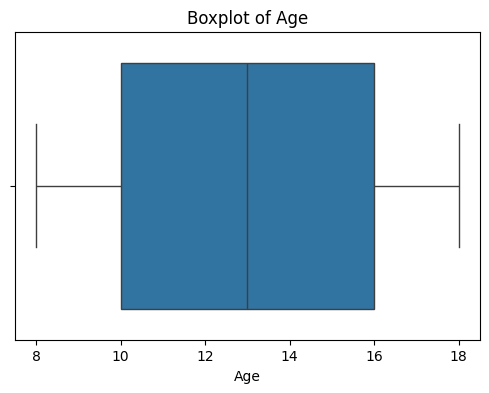

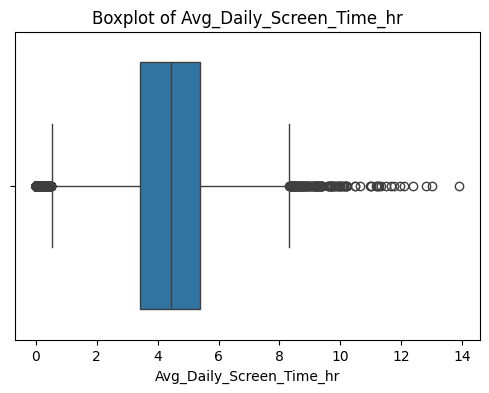

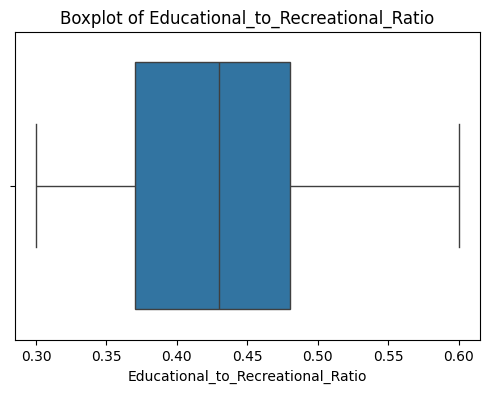

In [30]:
#outlier detection
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

